In [36]:
import numpy as np
import pandas as pd

In [37]:
df=pd.read_csv('newplacementdata - newplacementdata (1).csv')


In [38]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [39]:
df['cgpa'].shape

(1000,)

In [40]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

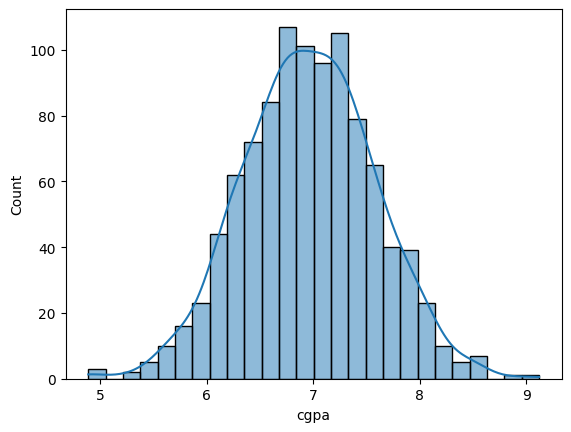

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['cgpa'], kde=True)
plt.show()

In [42]:
#z score

In [43]:
highest=df['cgpa'].mean()+3*df['cgpa'].std()
lowest=df['cgpa'].mean()-3*df['cgpa'].std()

In [44]:
highest

np.float64(8.808933625397168)

In [45]:
lowest

np.float64(5.113546374602832)

In [46]:
new_df=df[((df['cgpa']>highest) | (df['cgpa']<lowest))]

In [47]:
new_df

,cgpa,placement_exam_marks,placed
485,4.92,44,1
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
999,4.90,10,1


In [48]:
# trim
new_df=df[((df['cgpa']<highest) & (df['cgpa']>lowest))]

In [49]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1
994,6.48,63,0


In [50]:
# z score based trimming
df['z_score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [51]:
df.head()

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371


In [52]:
new_df=df[(df['z_score']<3)& (df['z_score']>-3)]

In [53]:
new_df

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
991,7.04,57,0,0.127878
992,6.26,12,0,-1.138565
993,6.73,21,1,-0.375452
994,6.48,63,0,-0.781363


In [54]:
#capping
highest=df['cgpa'].mean()+3*df['cgpa'].std()
lowest=df['cgpa'].mean()-3*df['cgpa'].std()

In [55]:
df['cgpa']=np.where(
    df['cgpa']>highest,highest,
    np.where(
        df['cgpa']<lowest,lowest,
        df['cgpa']
    )
)

In [56]:
df['cgpa'].shape

(1000,)

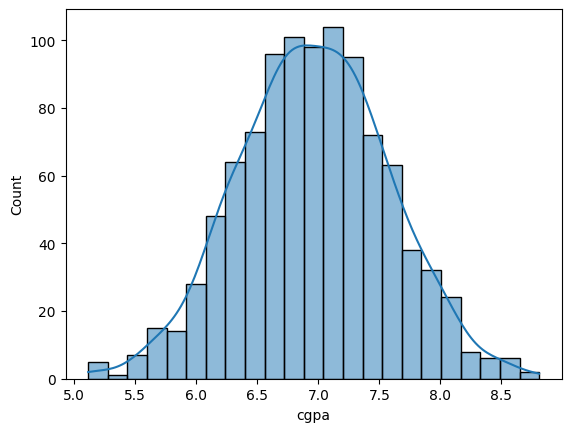

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['cgpa'], kde=True)
plt.show()